## Notebook setup

In [13]:
import os
import io
import warnings
import datetime
import numpy as np
import base64
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

# import sys
# sys.path.append('../../')

from openbb_terminal.sdk import widgets
from openbb_terminal.sdk import openbb
from openbb_terminal.helper_classes import TerminalStyle
from openbb_terminal.core.config.paths import REPOSITORY_DIRECTORY

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

pd.set_option("display.float_format", lambda x: "%.5f" % x)

In [14]:
try:
    theme = TerminalStyle("light", "light", "light")
except:
    pass
stylesheet = widgets.html_report_stylesheet()

## Select Ticker

In [15]:
# Parameters that will be replaced when calling this notebook
# Do not leave parameters blank as notebook will not run otherwise
symbol = "BTC"
report_name = f"Crypto Report for {symbol}"

In [16]:
ticker = symbol

In [17]:
author = ""
report_title = f"INVESTMENT RESEARCH REPORT ON {ticker.upper()}"
report_date = datetime.datetime.now().strftime("%d %B, %Y")
report_time = datetime.datetime.now().strftime("%H:%M")
report_timezone = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
report_title, report_date, report_time, report_timezone

('INVESTMENT RESEARCH REPORT ON BTC',
 '21 October, 2022',
 '19:28',
 datetime.timezone(datetime.timedelta(seconds=3600), 'WEST'))

In [18]:
# basic info
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import get_coinpaprika_id

cp_id = get_coinpaprika_id(ticker)
basic_info = openbb.crypto.dd.basic(cp_id)
if not basic_info.empty:
    basic_info = basic_info.set_index("Metric")
    basic_info

In [19]:
news = openbb.common.news(term=ticker).head(10)
news = news.set_index("published")
news.sort_index()
news["link"] = news["link"].apply(lambda x: f'<a href="{x}">{x}</a>')
news

Fetching data. Please be patient

,title,link
published,,
2022-10-21 18:01:55+00:00,Free BTC Faucet: What Is It And What Are Its B...,"<a href=""https://news.google.com/__i/rss/rd/ar..."
2022-10-21 17:37:15+00:00,Bitcoin Predictions: Why 55 Crypto Pros See BT...,"<a href=""https://news.google.com/__i/rss/rd/ar..."
2022-10-21 17:30:47+00:00,These Bitcoin [BTC] liquidation stats can help...,"<a href=""https://news.google.com/__i/rss/rd/ar..."
2022-10-21 17:01:50+00:00,Bitcoin Adoption: Relai Builds With Checkout.c...,"<a href=""https://news.google.com/__i/rss/rd/ar..."
2022-10-21 16:55:41+00:00,"Tesla Holds On to $218,000,000 Bitcoin (BTC) P...","<a href=""https://news.google.com/__i/rss/rd/ar..."
2022-10-21 16:08:17+00:00,Will ETH Continue in Its Five-Year Downtrend V...,"<a href=""https://news.google.com/__i/rss/rd/ar..."
2022-10-21 15:10:00+00:00,3 historically accurate Bitcoin on-chain metri...,"<a href=""https://news.google.com/__i/rss/rd/ar..."
2022-10-21 15:04:11+00:00,SUSHI to BTC prediction | SushiSwap Showing Si...,"<a href=""https://news.google.com/__i/rss/rd/ar..."
2022-10-21 14:44:31+00:00,Investment Giant Fidelity Plans Crypto Expansi...,"<a href=""https://news.google.com/__i/rss/rd/ar..."


In [20]:
links = openbb.crypto.dd.links(ticker)

if not links.empty:
    links = links.set_index("Name")

    links["Link"] = links["Link"].apply(lambda x: f'<a href="{x}">{x}</a>')

    links

In [21]:
# alt index

# fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
# openbb.crypto.ov.altindex(external_axes=[ax], chart=True)
# fig.tight_layout()
# f = io.BytesIO()
# fig.savefig(f, format="svg")
# altindex = f.getvalue().decode("utf-8")

In [22]:
five_year = datetime.datetime.now() - datetime.timedelta(days=1825)
three_year = datetime.datetime.now() - datetime.timedelta(days=1095)
one_year = datetime.datetime.now() - datetime.timedelta(days=365)
three_months = datetime.datetime.now() - datetime.timedelta(days=90)

dates = {
    "three_months": three_months,
    "one_year": one_year,
    "three_year": three_year,
    "five_year": five_year,
}

In [23]:
def get_historical_data(ticker, dict_of_dates, is_plot=True):

    list_of_historical_data = []

    for date in dict_of_dates:
        data = openbb.crypto.load(
            symbol=ticker,
            start_date=dict_of_dates[date],
        )

        # we'll be using the adjusted close price as same as close price
        data["Adj Close"] = data["Close"]

        if is_plot:
            fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
            plt.suptitle(
                f"{date} historical data for {ticker.upper()}",
                fontsize=14,
                color="black",
            )
            data.plot(y="Close", ax=ax)
            plt.ylabel("USDT")

            fig.tight_layout()
            f = io.BytesIO()
            fig.savefig(f, format="svg")
            plot_data = f.getvalue().decode("utf-8")

            list_of_historical_data.append(plot_data)
        else:
            list_of_historical_data.append(data)

    return list_of_historical_data

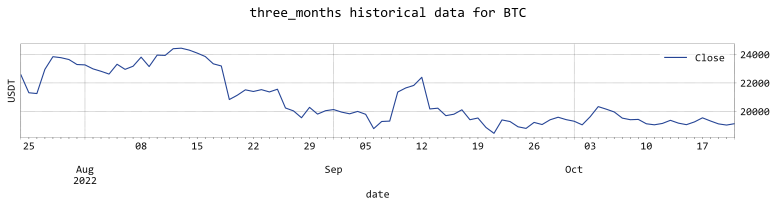

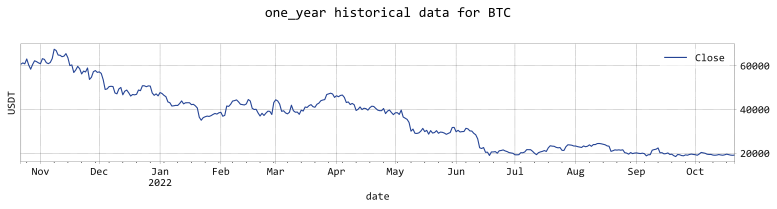

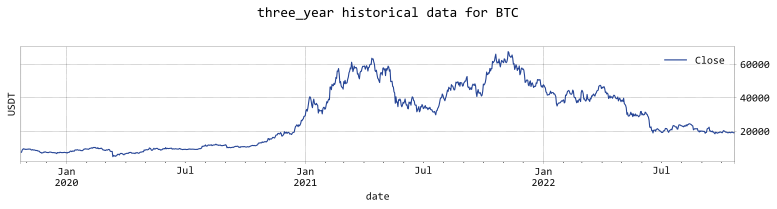

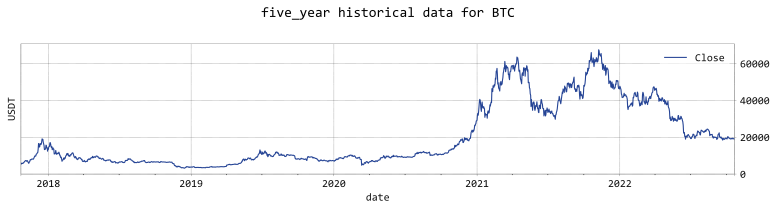

In [24]:
try:
    historical_data = get_historical_data(ticker, dates)
except Exception as e:
    raise KeyboardInterrupt

In [25]:
historical_data_one_year = get_historical_data(ticker, {"one_year": one_year}, False)[0]
historical_data_one_year

,Open,High,Low,Close,Volume,Adj Close
date,,,,,,
2021-10-22,62193.15000,63732.39000,60000.00000,60688.22000,52119.35886,60688.22000
2021-10-23,60688.23000,61747.64000,59562.15000,61286.75000,27626.93678,61286.75000
2021-10-24,61286.75000,61500.00000,59510.63000,60852.22000,31226.57676,60852.22000
2021-10-25,60852.22000,63710.63000,60650.00000,63078.78000,36853.83806,63078.78000
2021-10-26,63078.78000,63293.48000,59817.55000,60328.81000,40217.50083,60328.81000
...,...,...,...,...,...,...
2022-10-17,19262.98000,19676.96000,19152.03000,19549.86000,222813.87634,19549.86000
2022-10-18,19548.48000,19706.66000,19091.00000,19327.44000,260313.07848,19327.44000
2022-10-19,19327.44000,19360.16000,19065.97000,19123.97000,186137.29538,19123.97000


In [26]:
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import show_quick_performance

show_quick_performance(
    crypto_df=historical_data_one_year,
    symbol=ticker,
    current_currency="USDT",
    source="cctx",
    exchange="binance",
    interval="1440",
)

fig = plt.figure(figsize=(11, 3), dpi=150)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
quick_performance = f.getvalue().decode("utf-8")

                                              BTC/USDT Performance                                              
┏━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓
┃              ┃        ┃        ┃        ┃          ┃                  ┃                 ┃                    ┃
┃ Price (USDT) ┃ 1D     ┃ 7D     ┃ 1M     ┃ YTD      ┃ Volatility (Ann) ┃ Volume (7D avg) ┃ Circulating Supply ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩
│ 19139.03     │ 0.08 % │ -0.2 % │ 3.67 % │ -59.53 % │ 64.45 %          │ 238.06 K        │ 19.186 M           │
└──────────────┴────────┴────────┴────────┴──────────┴──────────────────┴─────────────────┴────────────────────┘

<Figure size 1650x450 with 0 Axes>

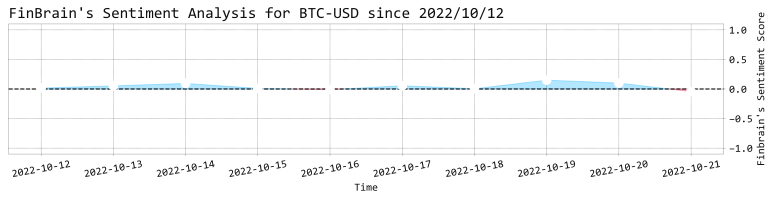

In [27]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.crypto.dd.headlines(ticker, external_axes=[ax], chart=True)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
headlines = f.getvalue().decode("utf-8")

In [28]:
# fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
# openbb.crypto.chart(
#     historical_data_one_year,
#     symbol=ticker,
#     currency="USDT",
#     source="cctx",
#     exchange="binance",
#     interval="1440",
#     external_axes=[ax1, ax2],
# )
# fig.tight_layout()
# f = io.BytesIO()
# fig.savefig(f, format="svg")
# one_year_candle = f.getvalue().decode("utf-8")

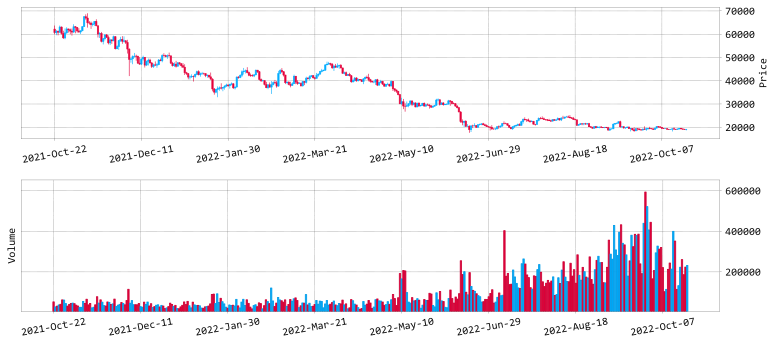

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.crypto.chart(
    historical_data_one_year,
    to_symbol=ticker,
    from_symbol="USDT",
    source="cctx",
    exchange="binance",
    interval="1440",
    external_axes=[ax1, ax2],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
candle_one_year = f.getvalue().decode("utf-8")

## Due Diligence

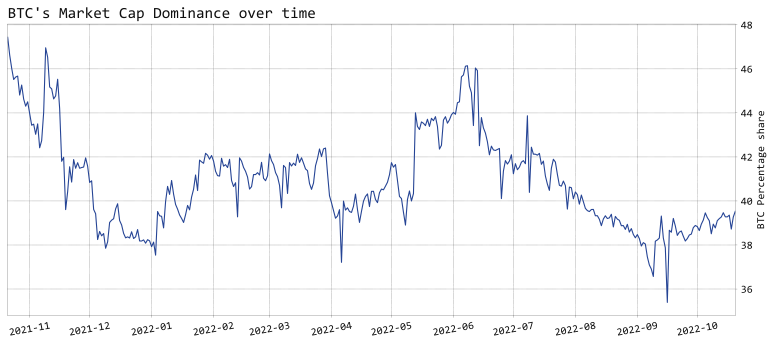

In [30]:
# market cap dominance

fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
openbb.crypto.dd.mcapdom(symbol=ticker, external_axes=[ax], chart=True)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
mcapdom = f.getvalue().decode("utf-8")
mcapdom_df = openbb.crypto.dd.mcapdom(symbol=ticker)

                                                    BTC Roadmap                                                    
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Title                              ┃ Date       ┃ Details                                                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Whitepaper                         │ 2008-10-31 │ Satoshi Nakamoto published the Bitcoin whitepaper             │
├────────────────────────────────────┼────────────┼───────────────────────────────────────────────────────────────┤
│ Genesis Block                      │ 2009-01-03 │ Bitcoin's genesis block is mined                              │
├────────────────────────────────────┼────────────┼───────────────────────────────────────────────────────────────┤
│ M-of-N Standard Transactions       │ 2011-10-02 │ BIP 011 implemented M-of-N-signatures required transactions   │
│                                    │            │ as a new 'standard' transaction type. This BIP enabled        │
│                                    │            │ secured wallets, escrow transactions, and other use cases     │
│                                    │            │ where redeeming funds requires more than a single signature.  │
│                                    │            │                                                               │
├────────────────────────────────────┼────────────┼───────────────────────────────────────────────────────────────┤
│ Pay to Script Hash                 │ 2012-01-03 │ BIP 016, building off of BIP 013, which introduced Pay to     │
│                                    │            │ Script Hash address types, implemented a new "standard"       │
│                                    │            │ transaction type for the Bitcoin scripting system and defined │
│                                    │            │ additional validation rules that apply only to the new        │
│                                    │            │ transactions.                                                 │
│                                    │            │                                                               │
│                                    │            │ The BIP moved the responsibility for supplying the conditions │
│                                    │            │ to redeem a transaction from the sender of the funds to the   │
│                                    │            │ redeemer. Furthermore, it allowed a sender to fund any        │
│                                    │            │ arbitrary transaction, no matter how complicated, using a     │
│                                    │            │ fixed-length 20-byte hash that is short enough to scan from a │
│                                    │            │ QR code or easily copied and pasted                           │
├────────────────────────────────────┼────────────┼───────────────────────────────────────────────────────────────┤
│ Hierarchical Deterministic Wallets │ 2012-02-11 │ BIP 032 introduced Hierarchical Deterministic Wallets ("HD    │
│                                    │            │ Wallets"), wallets that can be shared partially or entirely   │
│                                    │            │ with different systems, each with or without the ability to   │
│                                    │            │ spend coins. HD wallets allow for numerous cryptocurrency     │
│                                    │            │ wallets (public-private key pairs) to be generated from a     │
│                                    │            │ single seed phrase.                                           │
└────────────────────────────────────┴────────────┴───────────────────────────────────────────────────────────────┘

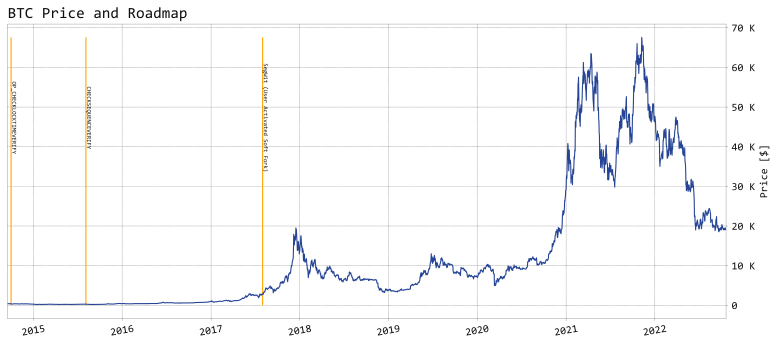

In [31]:
# roadmap

fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
openbb.crypto.dd.rm(symbol=ticker, external_axes=[ax], chart=True)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
roadmap_view = f.getvalue().decode("utf-8")

roadmap_model = openbb.crypto.dd.rm(symbol=ticker)

In [32]:
if not roadmap_model.empty:
    roadmap_model = roadmap_model.set_index("Date")
    roadmap_model.sort_index()
    roadmap_model

                                                  BTC Tokenomics                                                   
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Metric              ┃ Value                                                                                     ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ Emission Type       │ Inflationary                                                                              │
├─────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ Consensus Mechanism │ Proof-of-Work                                                                             │
├─────────────────────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ Consensus Details   │ Consensus                                                                                 │
│                     │ Bitcoin pioneered and currently uses <a                                                   │
│                     │ href="https://messari.io/article/nakamoto-consensus">Nakamoto Consensus</a> whereby the   │
│                     │ valid chain is the longest chain with the most accumulated <a                             │
│                     │ href="https://messari.io/resource/proof-of-work">proof-of-work</a>. Consensus in Bitcoin, │
│                     │ and other systems using Nakamoto Conensus, is probabilistic because there is always a     │
│                     │ chance that a new, longer competing chain could emerge with more accumulated              │
│                     │ proof-of-work, that would invalidate the current chain.                                   │
│                     │                                                                                           │
│                     │ Learn More:                                                                               │
│                     │ How Does Distributed Consensus Work Anyways?                                              │
│                     │ <a href="https://messari.io/article/nakamoto-consensus">Nakamoto Consensus</a>            │
│                     │                                                                                           │
│                     │ Mining                                                                                    │
│                     │ Miners solve computational puzzles to generate new blocks using a <a                      │
│                     │ href="https://messari.io/resource/sha-256">SHA-256</a> algorithm. In this process, miners │
│                     │ compete to generate a <a href="https://messari.io/blog/hash-function">hash</a> less than  │
│                     │ the target number set by Bitcoin's <a                                                     │
│                     │ href="https://messari.io/resource/difficulty-level">difficulty adjustment algorithm</a>.  │
│                     │ The target difficulty level is adjusted every 2016 blocks.                                │
│                     │                                                                                           │
│                     │ Although open to anyone with a CPU, Bitcoin mining is now dominated by <a                 │
│                     │ href="https://messari.io/resource/application-specific-integrated-circuits-asics">ASICs<… │
│                     │ situated in enterprise-scale data centers. In order to smooth individual miner revenue as │
│                     │ mining has become more competitive, mining is now done in pools where participants        │
│                     │ contribute <a href="https://messari.io/resource/hash-power">hash power</a> to the pool    │
│                     │ and receive a proportional share

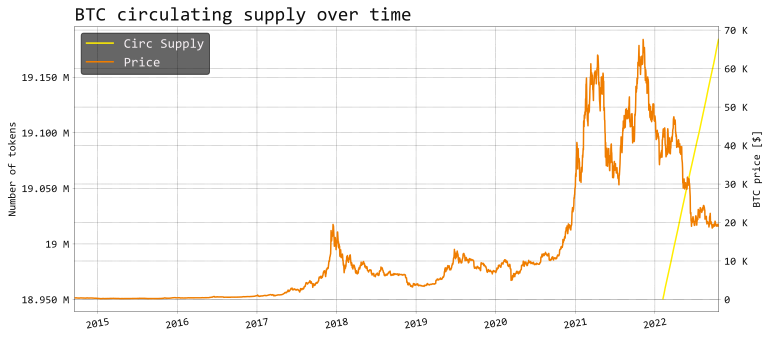

In [33]:
fig, ax1 = plt.subplots(figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.crypto.dd.tk(symbol=ticker, external_axes=[ax1, ax2], chart=True)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
tokenomics_view = f.getvalue().decode("utf-8")

In [34]:
tokenomics_model = openbb.crypto.dd.rm(symbol=ticker)
if not tokenomics_model.empty:
    tokenomics_model = tokenomics_model.set_index("Date")
    tokenomics_model.sort_index()
    tokenomics_model

In [35]:
# fundraise

fundraise = openbb.crypto.dd.fr(symbol=ticker)
fundraise_info = fundraise[0]
fundraise_df = fundraise[1]

In [36]:
trading_pair_info = openbb.crypto.dd.trading_pair_info(f"{ticker}-USDT")
if not trading_pair_info.empty:
    trading_pair_info = trading_pair_info.set_index("Metric")
    trading_pair_info

Metric       Value
0                        id    BTC-USDT
1             base_currency         BTC
2            quote_currency        USDT
3           quote_increment        0.01
4            base_increment  0.00000001
5              display_name    BTC/USDT
6          min_market_funds           1
7            margin_enabled       False
8             fx_stablecoin       False
9   max_slippage_percentage  0.03000000
10                post_only       False
11               limit_only       False
12              cancel_only       False
13         trading_disabled       False
14                   status      online
15           status_message            
16             auction_mode       False

In [37]:
import openbb_terminal.cryptocurrency.due_diligence.pycoingecko_model as gecko
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import get_coingecko_id

ath = pd.DataFrame()
try:
    cg_id = get_coingecko_id(symbol=ticker)
    coin = gecko.Coin(ticker)
    ath = coin.get_all_time_high(currency=cg_id)

except Exception as e:
    # ath = str("Reached coingecko API limit")
    pass

In [38]:
import openbb_terminal.cryptocurrency.due_diligence.pycoingecko_model as gecko
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import get_coingecko_id

atl = pd.DataFrame()
try:
    cg_id = get_coingecko_id(symbol=ticker)
    coin = gecko.Coin(ticker)
    atl = coin.get_all_time_low(currency=cg_id)

except Exception as e:
    # atl = str("Reached coingecko API limit")
    pass

In [39]:
# market stats about loaded coin
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import get_coinpaprika_id

cp_id = get_coinpaprika_id(ticker)
market = openbb.crypto.dd.mkt(cp_id)

if not market.empty:
    market = market.set_index("exchange")

    market["market_url"] = market["market_url"].apply(
        lambda x: f'<a href="{x}">{x}</a>'
    )

    market

In [40]:
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import get_coinpaprika_id

# all exchanges where loaded coin is listed
cp_id = get_coinpaprika_id(ticker)
ex = openbb.crypto.dd.ex(cp_id)
if not ex.empty:
    ex = ex.set_index("id")
    ex

In [41]:
# last trades
trades = openbb.crypto.dd.trades(symbol=f"{ticker}-USDT")
if not trades.empty:
    trades = trades.set_index("time")
    trades

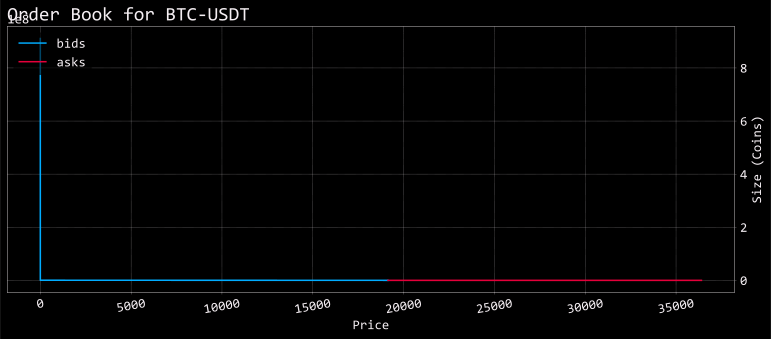

In [42]:
# order book

fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
openbb.crypto.dd.cbbook(symbol=f"{ticker}-USDT", external_axes=[ax], chart=True)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
order_book = f.getvalue().decode("utf-8")
order_book_raw = openbb.crypto.dd.cbbook(symbol=f"{ticker}-USDT")

In [43]:
order_book_raw

(array([[1.91355400e+04, 2.35000000e-01, 2.35000000e-01],
        [1.91347400e+04, 1.90000000e-01, 4.25000000e-01],
        [1.91342200e+04, 1.00000000e-01, 5.25000000e-01],
        ...,
        [3.00000000e-02, 4.20456589e+04, 4.46855221e+08],
        [2.00000000e-02, 3.76487830e+04, 4.55025006e+08],
        [1.00000000e-02, 2.95478172e+05, 9.10947826e+08]]),
 array([[1.91392400e+04, 1.00000000e-01, 4.55500000e-05],
        [1.91393900e+04, 3.99509700e-02, 4.04555000e-03],
        [1.91400400e+04, 5.00000000e-01, 4.48839000e-03],
        ...,
        [3.63743500e+04, 4.42840000e-04, 4.88339153e+02],
        [3.63797400e+04, 4.00000000e-03, 4.88379104e+02],
        [3.63990000e+04, 4.55500000e-05, 4.88479104e+02]]),
 'BTC-USDT',
 {'bids': [['19135.54', '0.235', 1],
   ['19134.74', '0.19', 1],
   ['19134.22', '0.1', 1],
   ['19134.21', '0.03976678', 1],
   ['19133.53', '0.24329387', 1],
   ['19133.34', '0.27323451', 1],
   ['19132.3', '0.01024077', 1],
   ['19131.65', '0.19443834', 1],


In [44]:
# price and supply related metrics for loaded coin
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import get_coinpaprika_id

cp_id = get_coinpaprika_id(ticker)
ps = openbb.crypto.dd.ps(cp_id)
if not ps.empty:
    ps = ps.set_index("Metric")
    ps

In [45]:
# events
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import get_coinpaprika_id

cp_id = get_coinpaprika_id(ticker)
events = openbb.crypto.dd.events(cp_id)

if not events.empty:
    events = events.set_index("date")

    events["link"] = events["link"].apply(lambda x: f'<a href="{x}">{x}</a>')

events

,date_to,name,description,is_conference,link
date,,,,,
2021-06-11\n00:00:00,None,Ask El Salvador for advice: Cuba suspends doll...,,False,"<a href=""https://www.rt.com/business/526265-cu..."
2021-06-11\n00:00:00,None,One of the Richest Bitcoin Whales in History B...,,False,"<a href=""https://aronboss.com/one-of-the-riche..."
2021-05-10\n00:00:00,None,Bitcoin’s upcoming Taproot upgrade and why it ...,,False,"<a href=""https://cointelegraph.com/news/bitcoi..."
2021-03-24\n08:00:00,2021-03-26\n23:00:00,THE CRYPTO GATHERING,,False,"<a href=""https://www.realvision.com/refer?grsf..."
2018-10-09\n09:00:00,2018-10-09\n18:00:00,Blockchain & Bitcoin Conference Switzerland,The second conference organized by\nSmile-Expo...,True,"<a href=""https://switzerland.bc.events/?utm_so..."
2018-09-28\n20:00:00,2018-09-30\n16:00:00,Super Conference,"KWIC, Kitchener - Waterloo, ON, Canada.\n29 Se...",True,"<a href=""https://blockchainsuperconference.com..."
2018-07-10\n12:00:00,None,SEC- ETF VanEck decision,,False,"<a href=""https://www.criptonoticias.com/mercad..."


In [46]:
# social media

from openbb_terminal.cryptocurrency.due_diligence.pycoingecko_view import display_social

display_social(ticker)
fig = plt.figure()
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
social = f.getvalue().decode("utf-8")

KeyboardInterrupt: 

In [ ]:
# tweets for loaded coin
from openbb_terminal.cryptocurrency.cryptocurrency_helpers import get_coinpaprika_id

cp_id = get_coinpaprika_id(ticker)
tweets = openbb.crypto.dd.twitter(cp_id)
tweets

In [ ]:
# github activity over time

gh_data = openbb.crypto.dd.gh(symbol=ticker)

if not gh_data.empty:
    fig, ax = plt.subplots(figsize=(11, 5), dpi=150)
    openbb.crypto.dd.gh(symbol=ticker, external_axes=[ax], chart=True)
    fig.tight_layout()
    f = io.BytesIO()
    fig.savefig(f, format="svg")
    gh = f.getvalue().decode("utf-8")

## TA


In [ ]:
ticker_data = historical_data_one_year.copy()

In [ ]:
# simple moving average
ticker_data.index.names = ["date"]

fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.common.ta.ma(
    data=ticker_data["Close"],
    ma_type="SMA",
    symbol=ticker,
    external_axes=[ax],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
sma = f.getvalue().decode("utf-8")

In [ ]:
# exponential moving average
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.common.ta.ma(
    data=ticker_data["Close"],
    ma_type="EMA",
    symbol=ticker,
    external_axes=[ax],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ema = f.getvalue().decode("utf-8")

In [ ]:
# zero lag exponential moving average

fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.common.ta.ma(
    data=ticker_data["Close"],
    ma_type="ZLMA",
    symbol=ticker,
    external_axes=[ax],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
zlma = f.getvalue().decode("utf-8")

In [ ]:
# commodity channel index

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.common.ta.cci(
    data=ticker_data,
    symbol=ticker,
    external_axes=[ax1, ax2],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
cci = f.getvalue().decode("utf-8")

In [ ]:
# moving average convergence/divergence

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.common.ta.macd(
    data=ticker_data["Adj Close"],
    symbol=ticker,
    external_axes=[ax1, ax2],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
macd = f.getvalue().decode("utf-8")

In [ ]:
# fisher transform

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 11), dpi=150)
ax3 = ax2.twinx()
openbb.common.ta.fisher(
    data=ticker_data,
    symbol=ticker,
    external_axes=[ax1, ax2, ax3],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
fisher = f.getvalue().decode("utf-8")

In [ ]:
# aroon indicator

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(11, 11), dpi=150)
openbb.common.ta.aroon(
    data=ticker_data,
    symbol=ticker,
    external_axes=[ax1, ax2, ax3],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
aroon = f.getvalue().decode("utf-8")

In [ ]:
# bollinger bands

fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.common.ta.bbands(
    data=ticker_data,
    symbol=ticker,
    external_axes=[ax],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
bbands = f.getvalue().decode("utf-8")

In [ ]:
# fibonacci retracement

fig, ax1 = plt.subplots(figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.common.ta.fib(
    data=ticker_data,
    symbol=ticker,
    external_axes=[ax1, ax2],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
fib = f.getvalue().decode("utf-8")

## QA

In [ ]:
# summary

summary = openbb.common.qa.summary(data=ticker_data)
summary

In [ ]:
# normality statistics and tests

# fig, _ = plt.subplots(figsize=(11, 3), dpi=150)
# openbb.common.qa.normality(
#     data=ticker_data,
#     target="Close",
#     chart=True,
# )
# fig.tight_layout()
# f = io.BytesIO()
# fig.savefig(f, format="svg")

normality = openbb.common.qa.normality(
    data=ticker_data["Close"],
)
normality

In [ ]:
# box and whisker plot

fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.common.qa.bw(
    symbol=ticker,
    data=ticker_data,
    target="Close",
    yearly=False,
    external_axes=[ax],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
bw = f.getvalue().decode("utf-8")

In [ ]:
# rolling mean and std deviation of prices

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.common.qa.rolling(
    symbol=ticker,
    data=ticker_data,
    target="Close",
    external_axes=[ax1, ax2],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
rolling = f.getvalue().decode("utf-8")

In [ ]:
# rolling kurtosis of distribution of prices

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.common.qa.kurtosis(
    symbol=ticker,
    data=ticker_data,
    target="Close",
    external_axes=[ax1, ax2],
    chart=True,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
kurtosis = f.getvalue().decode("utf-8")

## PRED

In [ ]:
# TODO: add prediction

## Render the report template to a file

In [ ]:
body = ""

img = str(REPOSITORY_DIRECTORY) + "/openbb_terminal/reports/templates/OpenBB_reports_logo.png"
floppy_disk_img = str(REPOSITORY_DIRECTORY) + "/openbb_terminal/reports/templates/floppy-disc.png"
body += widgets.header(
    img,
    floppy_disk_img,
    author,
    report_date,
    report_time,
    report_timezone,
    f"<b>INVESTMENT RESEARCH REPORT:</b> {ticker}",
)

body += widgets.tablinks(
    [
        "SUMMARY",
        "Due Diligence",
        "Technical Analysis",
        "Quantitative Analysis",
    ]
)

comment = ""

# Summary tab
htmlcode = ""
htmlcode += widgets.row(
    [widgets.h(3, "Basic information about loaded coin") + basic_info.to_html()]
)
if not links.empty:
    htmlcode += widgets.row([widgets.h(3, "Links") + links.to_html(escape=False)])

htmlcode += widgets.row([widgets.h(3, "Published news") + news.to_html(escape=False)])
# htmlcode += widgets.row([widgets.h(3, "Altindex")])
# htmlcode += widgets.row([altindex])

htmlcode += widgets.row([widgets.h(3, "Historical data")])
for data in historical_data:
    htmlcode += widgets.row([data])

htmlcode += widgets.row([widgets.h(3, "1-year historical data candlestick chart")])
htmlcode += widgets.row([candle_one_year])
htmlcode += widgets.row([widgets.h(3, "Sentiment analysis")])
htmlcode += widgets.row([headlines])
# TODO: print rich table
# htmlcode += widgets.row([widgets.h(3, "Quick performance")])
# htmlcode += widgets.row([quick_performance])
body += widgets.add_tab("SUMMARY", htmlcode)

# # Due diligence tab
htmlcode = ""
htmlcode += widgets.row(
    [widgets.h(3, f"Trading pair info {ticker}/USDT") + trading_pair_info.to_html()]
)
if not mcapdom_df.empty:
    htmlcode += widgets.row([widgets.h(3, "Market cap dominance")])
    htmlcode += widgets.row([mcapdom])

if not roadmap_model.empty:
    htmlcode += widgets.row([widgets.h(3, "Roadmap") + roadmap_model.to_html()])
    htmlcode += widgets.row([roadmap_view])

if not tokenomics_model.empty:
    htmlcode += widgets.row([widgets.h(3, "Tokenomics") + tokenomics_model.to_html()])
    htmlcode += widgets.row([tokenomics_view])

if not fundraise_df.empty:
    htmlcode += widgets.row([widgets.h(3, "Fundraising Details")])
    htmlcode += widgets.row([widgets.p(fundraise_info)])
    htmlcode += widgets.row([fundraise_df.to_html()])

if not ath.empty:
    htmlcode += widgets.row([widgets.h(3, "All time high")])
    htmlcode += widgets.row([ath.to_html()])

if not atl.empty:
    htmlcode += widgets.row([widgets.h(3, "All time low")])
    htmlcode += widgets.row([atl.to_html()])

htmlcode += widgets.row([widgets.h(3, "All markets")])
htmlcode += widgets.row([market.sample(n=20).sort_index().to_html(escape=False)])
htmlcode += widgets.row([widgets.h(3, "Exchanges where loaded coin is listed")])
htmlcode += widgets.row([ex.sample(n=20).sort_index().to_html()])
htmlcode += widgets.row([widgets.h(3, "Last trades")])
htmlcode += widgets.row([trades.tail(20).to_html()])

if order_book_raw:
    htmlcode += widgets.row([widgets.h(3, "Order book")])
    htmlcode += widgets.row([order_book])

htmlcode += widgets.row(
    [widgets.h(3, "Price and supply related metrics for loaded coin")]
)
htmlcode += widgets.row([ps.to_html()])
if not events.empty:
    htmlcode += widgets.row([widgets.h(3, "Events")])
    htmlcode += widgets.row([events.to_html(escape=False)])
# TODO: print rich table
# htmlcode += widgets.row([widgets.h(3, "Tweets for loaded coin")])
# htmlcode += widgets.row([tweets])
# htmlcode += widgets.row([widgets.h(3, "Social media")])
# htmlcode += widgets.row([social.to_html()])
if not gh_data.empty:
    htmlcode += widgets.row([widgets.h(3, "Github activity over time")])
    htmlcode += widgets.row([gh])
else:
    htmlcode += widgets.row([widgets.h(3, "Github activity over time")])
    htmlcode += widgets.row([widgets.p("No data available.")])

body += widgets.add_tab("Due Diligence", htmlcode)

# Technical Analysis tab
htmlcode = ""
htmlcode = widgets.row([widgets.h(3, "Simple moving average")])
htmlcode += widgets.row([sma])
htmlcode += widgets.row([widgets.h(3, "Exponential moving average")])
htmlcode += widgets.row([ema])
htmlcode += widgets.row([widgets.h(3, "Zero lag exponential moving average")])
htmlcode += widgets.row([zlma])
htmlcode += widgets.row([widgets.h(3, "Commodity channel index")])
htmlcode += widgets.row([cci])
htmlcode += widgets.row([widgets.h(3, "Moving average convergence/divergence")])
htmlcode += widgets.row([macd])
htmlcode += widgets.row([widgets.h(3, "Fisher transform")])
htmlcode += widgets.row([fisher])
htmlcode += widgets.row([widgets.h(3, "Aroon indicator")])
htmlcode += widgets.row([aroon])
htmlcode += widgets.row([widgets.h(3, "Bollinger bands")])
htmlcode += widgets.row([bbands])
htmlcode += widgets.row([widgets.h(3, "Fibonacci retracement")])
htmlcode += widgets.row([fib])
body += widgets.add_tab("Technical Analysis", htmlcode)

# Quantitative Analysis tab
htmlcode = ""
htmlcode = widgets.row([widgets.h(3, "Summary") + summary.to_html()])
htmlcode += widgets.row(
    [widgets.h(3, "Normality statistics and tests") + normality.to_html()]
)
htmlcode += widgets.row([widgets.h(3, "Box and whisker plot")])
htmlcode += widgets.row([bw])
htmlcode += widgets.row([widgets.h(3, "Rolling mean and std deviation of prices")])
htmlcode += widgets.row([rolling])
htmlcode += widgets.row([widgets.h(3, "Rolling kurtosis of distribution of prices")])
htmlcode += widgets.row([kurtosis])
body += widgets.add_tab("Quantitative Analysis", htmlcode)

body += widgets.tab_clickable_and_save_evt()
report = widgets.html_report(title=report_name, stylesheet=stylesheet, body=body)

# # to save the results
with open(report_name + ".html", "w", encoding="utf-8") as fh:
    fh.write(report)